In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set parameters
batch_size = 32
img_height = 150
img_width = 150

In [ ]:
# Dataset directory (adjust based on your environment)
data_dir = "/content/drive/MyDrive/kidney_stone/data_set/TRAIN"

In [ ]:
# Loading the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(img_height, img_width),
    validation_split=0.1,
    subset='training',
    seed=123,
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(img_height, img_width),
    validation_split=0.1,
    subset='validation',
    seed=123,
    batch_size=batch_size
)

Found 1203 files belonging to 2 classes.
Using 1083 files for training.
Found 1203 files belonging to 2 classes.
Using 120 files for validation.


In [ ]:
# Extract class names before normalizing the data
class_names = train_ds.class_names
label_to_class_name = dict(zip(range(len(class_names)), class_names))

In [ ]:
# Normalize the dataset (rescale the pixel values to [0, 1])
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
val_ds = val_ds.map(lambda x, y: (x / 255.0, y))

In [ ]:
# Load VGG16 without the top layer (used for transfer learning)
vgg16_base = VGG16(input_shape=(img_height, img_width, 3),
                   include_top=False,
                   weights='imagenet')

In [ ]:
# Freeze the layers of VGG16 so they are not trainable
for layer in vgg16_base.layers:
    layer.trainable = False

In [ ]:
# Create the model
model = models.Sequential([
    vgg16_base,  # Pre-trained VGG16 base
    layers.Flatten(),  # Flatten the feature maps
    layers.Dense(128, activation='relu'),  # Fully connected layer
    layers.Dropout(0.5),  # Regularization
    layers.Dense(4, activation='softmax')  # Output layer for 4 classes
])

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 26s 632ms/step - accuracy: 0.5968 - loss: 0.8476 - val_accuracy: 0.9833 - val_loss: 0.2166
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 22s 159ms/step - accuracy: 0.9500 - loss: 0.2236 - val_accuracy: 1.0000 - val_loss: 0.1009
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 215ms/step - accuracy: 0.9906 - loss: 0.1052 - val_accuracy: 1.0000 - val_loss: 0.0587
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 9s 164ms/step - accuracy: 0.9994 - loss: 0.0628 - val_accuracy: 1.0000 - val_loss: 0.0423
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 211ms/step - accuracy: 0.9983 - loss: 0.0444 - val_accuracy: 1.0000 - val_loss: 0.0303
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 195ms/step - accuracy: 0.9981 - loss: 0.0337 - val_accuracy: 1.0000 - val_loss: 0.0230
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 9s 161ms/step - accuracy: 0.9973 - loss: 0.0312 - val_accuracy: 1.0000 - val_loss: 0.0183
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 159ms/step - accuracy: 1.0000 - loss: 0.0243 - val_accuracy

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,862,350 (68.14 MB)

 Trainable params: 1,049,220 (4.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 2,098,442 (8.00 MB)

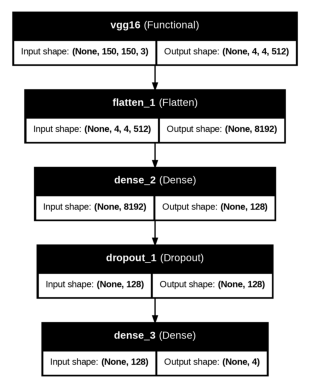

In [ ]:
from tensorflow.keras.utils import plot_model
# Print the model summary
model.summary()  # Print summary of the model architecture

# Plot model architecture and save the plot
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)
# Load the image to display
img = cv2.imread('model_architecture.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()


In [ ]:
# Print the final epoch's training and validation accuracy and loss
final_training_acc = history.history['accuracy'][-1]
final_training_loss = history.history['loss'][-1]
final_val_acc = history.history['val_accuracy'][-1]
final_val_loss = history.history['val_loss'][-1]

print(f"\nFinal Training Accuracy: {final_training_acc:.4f}")
print(f"Final Training Loss: {final_training_loss:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")


Final Training Accuracy: 1.0000
Final Training Loss: 0.0163
Final Validation Accuracy: 1.0000
Final Validation Loss: 0.0095


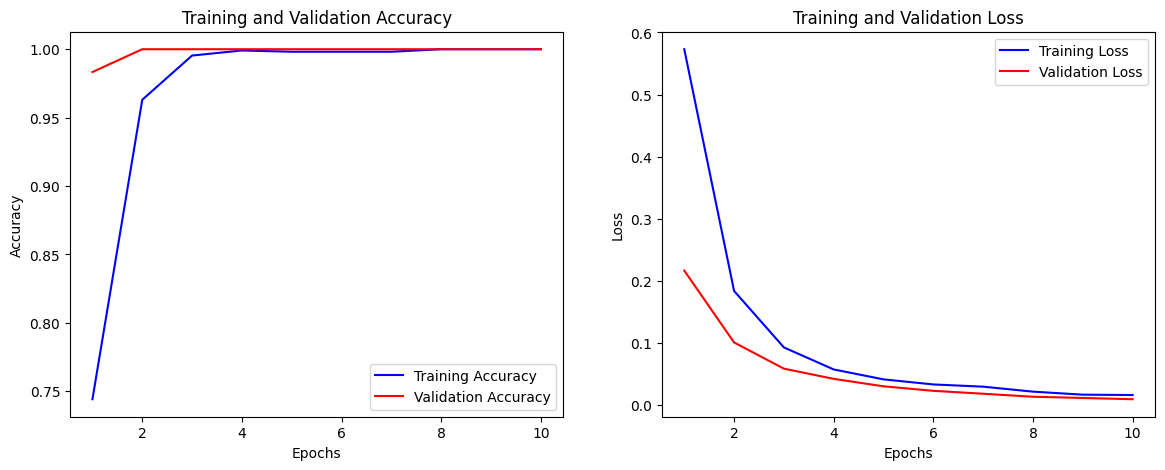

In [ ]:
# Plotting the training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc) + 1)
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, 'b', label='Training Accuracy')
plt.plot(epochs_range, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, 'b', label='Training Loss')
plt.plot(epochs_range, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# Predict labels for validation set
y_pred = []
y_true = []
for images, labels in val_ds:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 656ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


In [ ]:
# Classification report
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=class_names))


Classification Report:
               precision    recall  f1-score   support

      normal       1.00      1.00      1.00        70
       stone       1.00      1.00      1.00        50

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



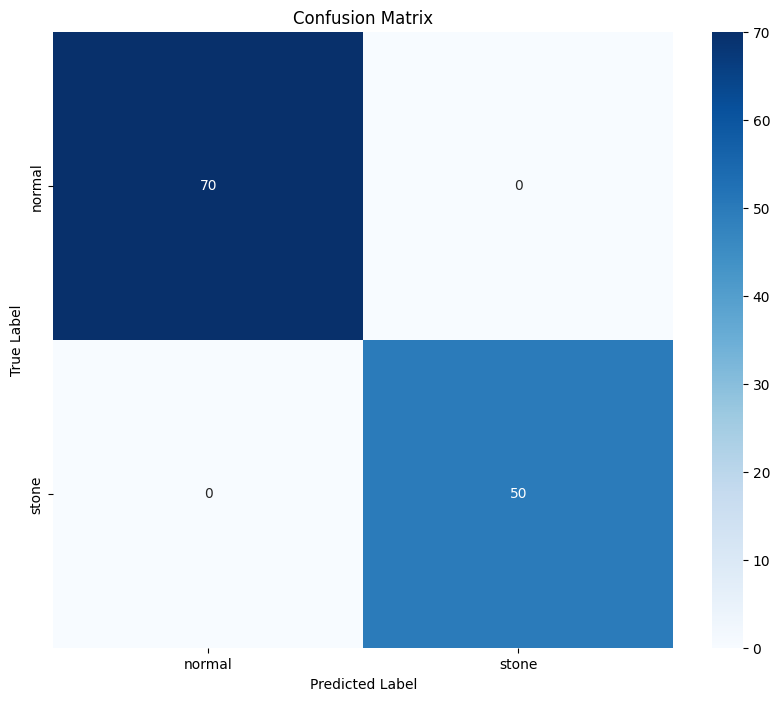

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Function to make predictions on an image
def predict_img(img):
    plt.imshow(img)
    plt.show()
    resize = tf.image.resize(img, (img_height, img_width))
    yhat = model.predict(np.expand_dims(resize / 255.0, 0))
    max_index = np.argmax(yhat)
    label = label_to_class_name[max_index]
    return label

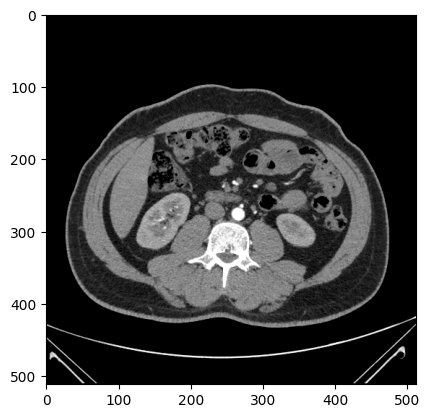

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
Predicted label: normal


In [ ]:
# Load a sample image for prediction
img = cv2.imread('/content/Normal- (99).jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
predicted_label = predict_img(img_rgb)
print(f"Predicted label: {predicted_label}")

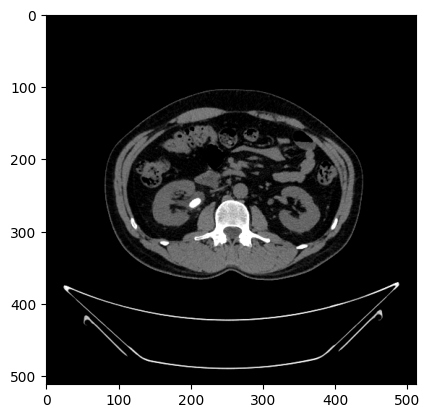

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted label: stone


In [ ]:
# Load a sample image for prediction
img = cv2.imread('/content/Stone- (9).jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
predicted_label = predict_img(img_rgb)
print(f"Predicted label: {predicted_label}")